In [40]:
import casadi as ca
import numpy as np

import matplotlib as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

$\phi(x) = \frac{1}{2} x^{T} A x - b^{T}x$

In [41]:
Nx = 2
N_iter = 10
x_lim = 5
y_lim = 5
delta = 1

x_init = ca.DM([2,2])

diag_1 = 1
diag_2 = 10
b1 = 1
b2 = 1
x_SX = ca.SX.sym('x',Nx)    
A = ca.diag([diag_1,diag_2])
b = ca.DM([b1,b2])
f = 1/2 * x_SX.T @ A @ x_SX - b.T @ x_SX
# f = x_SX[0] ** 2 + ca.sin(x_SX[1]) 

f_func = ca.Function("f_func",[x_SX],[f])
# H,g = ca.hessian(f,x_SX)

# grad_func = ca.Function("grad_func", [x_SX],[g])
# hessian_func = ca.Function("hessian_func", [x_SX],[H])

In [79]:
def CG_Preliminary(A, b, x0, N_iter):
    r0 = A @ x0 - b
    p0 = -r0
    
    rk = r0
    pk = p0
    xk = x0
    
    x_sol_list = []
    x_sol_list += xk.full().flatten().tolist()
    for i in range(N_iter):
        alpha_k = - (rk.T @ pk) / (pk.T @ A @ pk)
        xk_next = xk + alpha_k * pk
        rk_next = A @ xk_next - b
        beta_k_next = (rk_next.T @ A @ pk) / (pk.T @ A @ pk)
        pk_next = -rk_next + beta_k_next * pk
        # update
        rk = rk_next
        pk = pk_next
        xk = xk_next
        print("p"+str(i), pk)
        x_sol_list += xk.full().flatten().tolist()
    
    return x_sol_list

In [80]:
def CG(A, b, x0, N_iter):
    r0 = A @ x0 - b
    p0 = -r0
    
    rk = r0
    pk = p0
    xk = x0
    
    x_sol_list = []
    x_sol_list += xk.full().flatten().tolist()
    for i in range(N_iter):
        alpha_k = (rk.T @ rk) / (pk.T @ A @ pk)
        xk_next = xk + alpha_k * pk
        rk_next = rk + alpha_k * A @ pk
        beta_k_next = (rk_next.T @ rk_next) / (rk.T @ rk)
        pk_next = - rk_next + beta_k_next * pk
        # update
        rk = rk_next
        pk = pk_next
        xk = xk_next
        print("x"+str(i), xk)
        x_sol_list += xk.full().flatten().tolist()
    
    return x_sol_list

In [ ]:
def Preconditioned_CG(A, b, x0, N_iter):
    r0 = A @ x0 - b
    p0 = -r0
    
    rk = r0
    pk = p0
    xk = x0
    
    x_sol_list = []
    x_sol_list += xk.full().flatten().tolist()
    for i in range(N_iter):
        alpha_k = (rk.T @ rk) / (pk.T @ A @ pk)
        xk_next = xk + alpha_k * pk
        rk_next = rk + alpha_k * A @ pk
        beta_k_next = (rk_next.T @ rk_next) / (rk.T @ rk)
        pk_next = - rk_next + beta_k_next * pk
        # update
        rk = rk_next
        pk = pk_next
        xk = xk_next
        print("x"+str(i), xk)
        x_sol_list += xk.full().flatten().tolist()
    
    return x_sol_list

In [81]:
x_list = CG_Preliminary(A,b,x_init,N_iter)

p0 [-0.901993, 0.00474733]
p1 [7.00999e-17, 1.3319e-15]
p2 [0, 0]
p3 [nan, nan]
p4 [nan, nan]
p5 [nan, nan]
p6 [nan, nan]
p7 [nan, nan]
p8 [nan, nan]
p9 [nan, nan]


nan


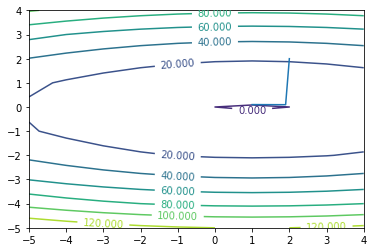

In [82]:
x = np.arange(-x_lim, x_lim, delta)
y = np.arange(-y_lim, y_lim, delta)
X, Y = np.meshgrid(x, y)
Z =1/2 * (diag_1 * X **2 + diag_2 * Y ** 2) - b1 * X + b2 * Y
fig, ax = plt.subplots()
x1 = x_list[::2]
x2 = x_list[1::2]
ax.plot(x1,x2)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
print(f_func([x1[-1],x2[-1]]))

In [83]:
x_list = CG(A,b,x_init,N_iter)

x0 [1.89975, 0.0952645]
x1 [1, 0.1]
x2 [1, 0.1]
x3 [1, 0.1]
x4 [1, 0.1]
x5 [1, 0.1]
x6 [1, 0.1]
x7 [1, 0.1]
x8 [1, 0.1]
x9 [1, 0.1]


-0.55


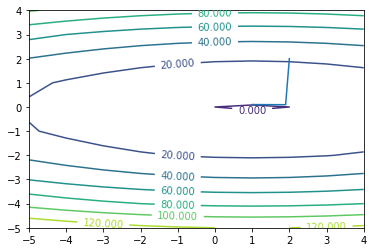

In [84]:
x = np.arange(-x_lim, x_lim, delta)
y = np.arange(-y_lim, y_lim, delta)
X, Y = np.meshgrid(x, y)
Z =1/2 * (diag_1 * X **2 + diag_2 * Y ** 2) - b1 * X + b2 * Y
fig, ax = plt.subplots()
x1 = x_list[::2]
x2 = x_list[1::2]
ax.plot(x1,x2)
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
print(f_func([x1[-1],x2[-1]]))